In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [9]:
df=pd.read_csv('GOOGL.csv')

In [10]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4431 non-null   object 
 1   Open       4431 non-null   float64
 2   High       4431 non-null   float64
 3   Low        4431 non-null   float64
 4   Close      4431 non-null   float64
 5   Adj Close  4431 non-null   float64
 6   Volume     4431 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 242.4+ KB


In [13]:
df['Date']=pd.to_datetime(df['Date'])

In [27]:
df.set_index(df['Date'],inplace=True)
df.drop(columns=['Date'],inplace=True)

In [28]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096.0
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343.0
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126.0
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337.0
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4431 entries, 2004-08-19 to 2022-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4431 non-null   float64
 1   High       4431 non-null   float64
 2   Low        4431 non-null   float64
 3   Close      4431 non-null   float64
 4   Adj Close  4431 non-null   float64
 5   Volume     4431 non-null   float64
dtypes: float64(6)
memory usage: 242.3 KB


In [30]:
df['Volume']=df['Volume'].astype('float')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4431 entries, 2004-08-19 to 2022-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4431 non-null   float64
 1   High       4431 non-null   float64
 2   Low        4431 non-null   float64
 3   Close      4431 non-null   float64
 4   Adj Close  4431 non-null   float64
 5   Volume     4431 non-null   float64
dtypes: float64(6)
memory usage: 242.3 KB


In [32]:
df.shape

(4431, 6)

In [33]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [38]:
print(round(len(df)*0.80))

3545


In [66]:
train_df,test_df=df[:3545],df[3545:]

In [67]:
train_df.shape
train_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096.0
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343.0
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126.0
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337.0
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602.0
...,...,...,...,...,...,...
2018-09-11,1171.099976,1190.939941,1165.949951,1189.989990,1189.989990,1462700.0
2018-09-12,1182.000000,1190.689941,1166.160034,1171.599976,1171.599976,1785800.0
2018-09-13,1179.699951,1187.859985,1169.219971,1182.140015,1182.140015,2003400.0


In [68]:
test_df.shape

(886, 6)

In [69]:
scaler=MinMaxScaler(feature_range=(0,1))
train_df_scaled=scaler.fit_transform(train_df)
test_df_scaled=scaler.fit_transform(test_df)

In [70]:
train_df_scaled

array([[3.27076291e-04, 9.36027567e-04, 0.00000000e+00, 1.33688677e-04,
        1.33688677e-04, 5.40710393e-01],
       [7.34916593e-04, 2.96140240e-03, 1.87022750e-03, 3.36247683e-03,
        3.36247683e-03, 2.73350337e-01],
       [4.66793067e-03, 4.73662871e-03, 5.39234743e-03, 3.80405377e-03,
        3.80405377e-03, 2.17265746e-01],
       ...,
       [9.11720678e-01, 9.16502726e-01, 9.22813010e-01, 9.16337846e-01,
        9.16337846e-01, 1.81647642e-02],
       [9.18417099e-01, 9.16615594e-01, 9.26352227e-01, 9.12970610e-01,
        9.12970610e-01, 8.43066544e-03],
       [9.10163623e-01, 9.11633765e-01, 9.13956831e-01, 8.98279527e-01,
        8.98279527e-01, 1.45068207e-02]])

In [72]:
test_df_scaled

array([[0.08739245, 0.08381669, 0.09187034, 0.09067144, 0.09067144,
        0.18570068],
       [0.09047962, 0.08131029, 0.09046554, 0.09422993, 0.09422993,
        0.13441945],
       [0.09621795, 0.09009268, 0.09927913, 0.10282787, 0.10282787,
        0.16091583],
       ...,
       [0.8515348 , 0.89601303, 0.8720455 , 0.90089463, 0.90089463,
        0.21138973],
       [0.87702631, 0.88153421, 0.88937769, 0.88506535, 0.88506535,
        0.12789628],
       [0.88190211, 0.90164995, 0.88853285, 0.91783208, 0.91783208,
        0.13761646]])

In [76]:
def series_split(dataset,n_past):
    X = []
    Y = []
    for i in range(n_past, len(dataset)):
            X.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            Y.append(dataset[i,0])
    return np.array(X),np.array(Y)

In [77]:
n_past=30
trainX,trainY=series_split(train_df_scaled,30)
testX,testY=series_split(test_df_scaled,30)

In [78]:
trainX.shape

(3515, 30, 6)

In [79]:
trainY.shape

(3515,)

In [80]:
testX.shape

(856, 30, 6)

In [81]:
testY.shape

(856,)

In [83]:
trainY[0]

0.012764123153206818

In [88]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

def build_model(optimizer='adam'):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(30, 6)))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer=optimizer)
    return model

grid_model = KerasRegressor(build_fn=build_model, verbose=1)

parameters = {
    'batch_size': [16, 20],
    'epochs': [8, 10],
    'optimizer': ['adam', 'Adadelta']
}

grid_search = GridSearchCV(estimator=grid_model,
                           param_grid=parameters,
                           cv=2)

grid_search.fit(trainX, trainY)


Epoch 1/8


C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0417
Epoch 2/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0022
Epoch 3/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0022
Epoch 4/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0023
Epoch 5/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0020
Epoch 6/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0017
Epoch 7/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016
Epoch 8/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0019
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Epoch 1/8


C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0023
Epoch 2/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.3577e-04 
Epoch 3/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.0278e-04
Epoch 4/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.7478e-04
Epoch 5/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.5652e-04
Epoch 6/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.3827e-04
Epoch 7/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.2659e-04
Epoch 8/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.1315e-04
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Epoch 1/8


C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0324
Epoch 2/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0025
Epoch 3/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0025
Epoch 4/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0023
Epoch 5/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0022
Epoch 6/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0022
Epoch 7/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0019
Epoch 8/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0017
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Epoch 1/8


C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0016
Epoch 2/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.2876e-04
Epoch 3/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.1881e-04
Epoch 4/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9120e-04
Epoch 5/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6708e-04
Epoch 6/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.5635e-04
Epoch 7/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.3156e-04
Epoch 8/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.1286e-04
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Epoch 1/10


C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0538
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0024
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0020
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0021
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0019
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0018
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0020
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017
Epoch 9/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0018
Epoch 10/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0021
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Epoch 1/10


C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0028
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.4808e-04
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.0376e-04
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.8709e-04
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.6027e-04
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.6972e-04
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.4568e-04
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.1637e-04
Epoch 9/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.1913e-04
Epoch 10/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.0670e-04
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Epoch 1/10


C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0456
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0025
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0028
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0020
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0019
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0018
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0019
Epoch 9/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0021
Epoch 10/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0013
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Epoch 1/10


C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0027
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.8070e-04
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0736e-04
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.8473e-04
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.6744e-04
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.4815e-04
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.2123e-04
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.4929e-04
Epoch 9/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.1311e-04
Epoch 10/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.0170e-04
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Epoch 1/8


C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0170
Epoch 2/8
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0026
Epoch 3/8
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0019
Epoch 4/8
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0019
Epoch 5/8
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0023
Epoch 6/8
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0021
Epoch 7/8
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0015
Epoch 8/8
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0017
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Epoch 1/8


C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0029
Epoch 2/8
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.7922e-04
Epoch 3/8
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.9872e-04
Epoch 4/8
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.9705e-04
Epoch 5/8
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.8193e-04
Epoch 6/8
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6985e-04 
Epoch 7/8
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.4993e-04
Epoch 8/8
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.4195e-04
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Epoch 1/8


C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0372
Epoch 2/8
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0029
Epoch 3/8
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0023
Epoch 4/8
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0025
Epoch 5/8
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0023
Epoch 6/8
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0022
Epoch 7/8
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0020
Epoch 8/8
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0018
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Epoch 1/8


C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0041
Epoch 2/8
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.9928e-04
Epoch 3/8
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.5939e-04
Epoch 4/8
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.1380e-04
Epoch 5/8
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.7743e-04
Epoch 6/8
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.8021e-04
Epoch 7/8
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.6217e-04
Epoch 8/8
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.4647e-04
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Epoch 1/10


C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0334
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0027
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0023
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0021
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0019
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0018
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0020
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0018
Epoch 9/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0020
Epoch 10/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0017
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Epoch 1/10


C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0045
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.6309e-04
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.1329e-04
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.0333e-04
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.7842e-04
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.5989e-04
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.4039e-04
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.3661e-04
Epoch 9/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.4000e-04
Epoch 10/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.1445e-04 
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Epoch 1/10


C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0208
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0024
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0020
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0021
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0020
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0019
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0015
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0016
Epoch 9/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0017
Epoch 10/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0016
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Epoch 1/10


C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0047
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.3934e-04
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.5085e-04
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.9497e-04
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.0544e-04
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.5243e-04
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.4406e-04
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.3926e-04
Epoch 9/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.1704e-04
Epoch 10/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.1510e-04
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Epoch 1/10


C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0154
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0012
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0011
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0011
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 9.5719e-04
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 9.9658e-04
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 8.7625e-04
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 7.7454e-04
Epoch 9/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 7.5554e-04
Epoch 10/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 7.4557e-04


GridSearchCV(cv=2,
             estimator=KerasRegressor(build_fn=<function build_model at 0x000002086B586A20>),
             param_grid={'batch_size': [16, 20], 'epochs': [8, 10],
                         'optimizer': ['adam', 'Adadelta']})

In [89]:
grid_search.best_params_

{'batch_size': 20, 'epochs': 10, 'optimizer': 'Adadelta'}

In [90]:
my_model=grid_search.best_estimator_.model

In [94]:
# Build and compile the model
my_model = build_model(optimizer='adam')

# Fit the model
my_model.fit(trainX, trainY, epochs=10, batch_size=32, validation_split=0.2)

# Predict with the trained model
prediction = my_model.predict(testX)
print("prediction\n", prediction)
print("\nPrediction Shape-", prediction.shape)


Epoch 1/10


C:\Users\arunendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0108 - val_loss: 0.0049
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.1764e-04 - val_loss: 0.0030
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.7802e-04 - val_loss: 0.0012
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.0704e-04 - val_loss: 6.3506e-04
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 5.1954e-04 - val_loss: 0.0011
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.0847e-04 - val_loss: 5.3396e-04
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 3.5450e-04 - val_loss: 4.7104e-04
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.8036e-04 - val_loss: 4.4198e-04
Epoch 9/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.2874e-04 - val_loss: 8.2891e-04
Epoch 10/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.7546e-04 - val_loss: 0.0022
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
prediction
 [[0.05085433]
 [0.04681761]
 [0.04376171]
 [0.041818

In [95]:
prediction.shape

(856, 1)

In [100]:
prediction_copies_array = np.repeat(prediction,6, axis=-1)

In [101]:
prediction_copies_array.shape

(856, 6)

In [102]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),6)))[:,0]

In [103]:
original_copies_array = np.repeat(testY,6, axis=-1)
original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),6)))[:,0]

In [104]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- " ,original)

Pred Values--  [1088.0974 1079.8597 1073.6237 1069.659  1067.2476 1064.5431 1062.2196
 1062.3429 1064.2888 1065.9895 1066.2667 1065.1641 1063.4783 1061.9286
 1060.6853 1058.6311 1054.392  1050.6824 1046.8749 1044.3752 1043.1461
 1044.1195 1047.304  1052.3646 1059.5629 1065.3887 1068.1963 1068.9252
 1067.5303 1065.97   1065.313  1065.2136 1064.5164 1062.1742 1059.0814
 1055.9169 1051.6361 1046.2461 1038.6464 1032.235  1027.9713 1026.4006
 1026.6843 1027.6387 1028.9586 1031.6082 1035.8228 1041.1047 1046.7089
 1051.7148 1055.4587 1057.337  1059.1044 1061.969  1065.4047 1069.8595
 1073.3245 1075.7626 1077.2094 1079.019  1080.1676 1080.3138 1080.6326
 1082.9336 1086.4707 1090.9574 1096.0166 1100.9897 1103.3423 1103.7314
 1103.3639 1103.6481 1105.1906 1107.1619 1109.4684 1111.3678 1112.9912
 1113.4117 1113.0698 1112.7483 1112.328  1111.9104 1111.9164 1113.2073
 1116.0225 1120.2577 1125.411  1129.8739 1132.879  1136.2227 1141.1151
 1147.4255 1153.8593 1159.6149 1164.3746 1168.701  1173.4625 1

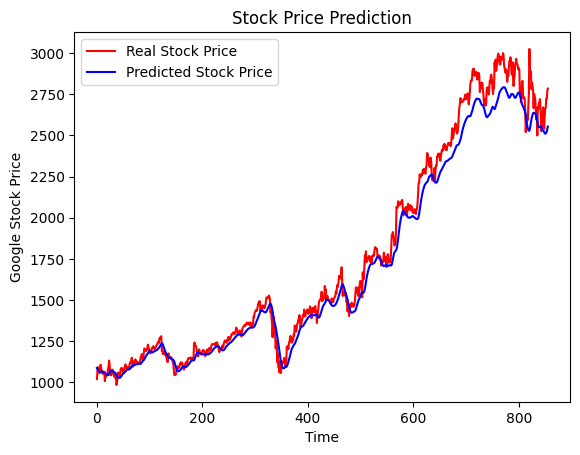

In [105]:
plt.plot(original, color = 'red', label = 'Real Stock Price')
plt.plot(pred, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()